___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [2]:
df0 = pd.read_csv('Frozen_Dessert_Production.csv',
                index_col='DATE',
                parse_dates=True
                )
df = df0.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [5]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [6]:
df.rename(columns = {'IPN31152N' : 'Production'}, inplace = True)

In [7]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


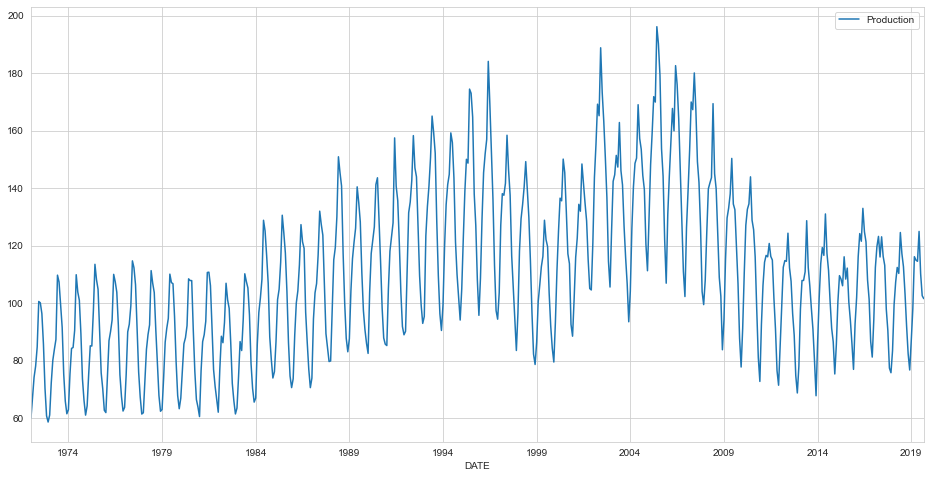

In [8]:
df.plot(figsize=(16,8));

# Preprocessing of Data

## Train Test Split

In [9]:
len(df)

573

In [10]:
test_size = 36

In [11]:
test_ind = len(df)- test_size
test_ind

537

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [13]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2016-05-01,121.543
2016-06-01,132.987
2016-07-01,124.851


In [14]:
test

,Production
DATE,
2016-10-01,101.384
2016-11-01,86.665
2016-12-01,81.257
2017-01-01,94.245
2017-02-01,112.388
2017-03-01,119.698
2017-04-01,123.228
2017-05-01,116.064
2017-06-01,123.087


## Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [20]:
len(generator)

525

In [21]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [22]:
X,y = generator[0]

In [23]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [25]:
train_scaled.shape

(537, 1)

In [26]:
n_features = train_scaled.shape[1]

In [27]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences = True, input_shape = (length,n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


### Evaluation on Test Data

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', patience = 10, restore_best_weights = True)
# monitor de belirdegimiz takip edilecek score a göre mode secilmeli. 
# Hata score u icin min olarak, recall vb score lar icin max olarak secilmeli.

In [31]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [32]:
len(validation_generator)

# 24-12 = 12 tane 

# son 24 taneyi test için ayırdık, bunların içinden stride 1 olacak şekilde 
# 12 lik gruplar halinde ve kaydıra kaydıra işlem yaparak 12 tane değer üretti. 

24

In [33]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
525/525 [==============================] - 8s 8ms/step - loss: 0.0229 - val_loss: 0.0068
Epoch 2/120
525/525 [==============================] - 4s 7ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 3/120
525/525 [==============================] - 4s 7ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 4/120
525/525 [==============================] - 5s 9ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 5/120
525/525 [==============================] - 5s 9ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 6/120
525/525 [==============================] - 4s 7ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 7/120
525/525 [==============================] - 4s 7ms/step - loss: 0.0037 - val_loss: 0.0094
Epoch 8/120
525/525 [==============================] - 5s 9ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 9/120
525/525 [==============================] - 5s 10ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 10/120
525/525 [==============================] - 5s 9ms/step - loss: 0.0031 - val_l

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [36]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)
    
# train datamızın sonundan 12lik bir parçayı aldık. bu bizim ilk eval_batch imiz olacak. bundan ileriye forecast yapacağız
# sonra bunu reshape yaptık (1,12,1) oldu  ( (1, length, n_features) )
# bundan for döngüsü içinde current_batch i hep bir ilerletecek şekilde predict ler alıp alıp test_prediction a kaydettim. 

1/1 [==============================] - 0s 16ms/step


In [37]:
predictions_scaled

[array([0.2800778], dtype=float32),
 array([0.21259505], dtype=float32),
 array([0.17986499], dtype=float32),
 array([0.21913838], dtype=float32),
 array([0.30794364], dtype=float32),
 array([0.37823892], dtype=float32),
 array([0.40597725], dtype=float32),
 array([0.444847], dtype=float32),
 array([0.48968118], dtype=float32),
 array([0.46682364], dtype=float32),
 array([0.4216782], dtype=float32),
 array([0.35411802], dtype=float32)]

In [38]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.7762242200443845 
mae: 0.04142805876429279 
mse: 0.0022398789371274115 
rmse: 0.04732735928749259


### Inverse Transformation and Comparing

In [39]:
predictions = scaler.inverse_transform(predictions_scaled)

In [40]:
compare = test[:12]

In [41]:
compare['Predictions'] = predictions

In [42]:
compare

,Production,Predictions
DATE,,
2016-10-01,101.384,97.174
2016-11-01,86.665,87.895
2016-12-01,81.257,83.394
2017-01-01,94.245,88.794
2017-02-01,112.388,101.006
2017-03-01,119.698,110.673
2017-04-01,123.228,114.487
2017-05-01,116.064,119.832
2017-06-01,123.087,125.998


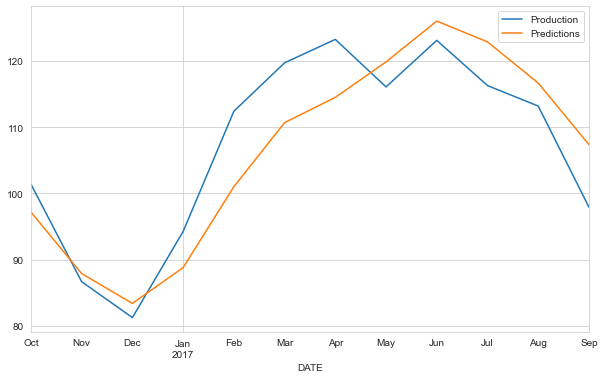

In [43]:
compare.plot();

## with "relu" activation function

In [44]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences = True, input_shape = (length,n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [45]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
525/525 [==============================] - 5s 7ms/step - loss: 0.0273 - val_loss: 0.0064
Epoch 2/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0083 - val_loss: 0.0029
Epoch 3/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0085 - val_loss: 0.0207
Epoch 4/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0073 - val_loss: 0.0136
Epoch 5/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0070 - val_loss: 0.0052
Epoch 6/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0072 - val_loss: 0.0034
Epoch 7/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0059 - val_loss: 0.0195
Epoch 8/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0059 - val_loss: 0.0071
Epoch 9/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 10/120
525/525 [==============================] - 3s 6ms/step - loss: 0.0050 - val_lo

### Evaluation on Test Data

In [46]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)
    
# train datamızın sonundan 12lik bir parçayı aldık. bu bizim ilk eval_batch imiz olacak. bundan ileriye forecast yapacağız
# sonra bunu reshape yaptık (1,12,1) oldu  ( (1, length, n_features) )
# bundan for döngüsü içinde current_batch i hep bir ilerletecek şekilde predict ler alıp alıp test_prediction a kaydettim. 

1/1 [==============================] - 0s 24ms/step


In [47]:
predictions_scaled

[array([0.26868066], dtype=float32),
 array([0.19660711], dtype=float32),
 array([0.15315062], dtype=float32),
 array([0.19902004], dtype=float32),
 array([0.27953094], dtype=float32),
 array([0.35950848], dtype=float32),
 array([0.41515818], dtype=float32),
 array([0.461079], dtype=float32),
 array([0.48368794], dtype=float32),
 array([0.47153577], dtype=float32),
 array([0.4287503], dtype=float32),
 array([0.3545035], dtype=float32)]

In [48]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.6780892944552426 
mae: 0.048563317596027646 
mse: 0.0032221583994860394 
rmse: 0.05676405904695364


### Inverse Transformation and Comparing

In [49]:
predictions = scaler.inverse_transform(predictions_scaled)

In [50]:
compare = test[:12]

In [51]:
compare['Predictions'] = predictions

In [52]:
compare

,Production,Predictions
DATE,,
2016-10-01,101.384,95.607
2016-11-01,86.665,85.696
2016-12-01,81.257,79.720
2017-01-01,94.245,86.028
2017-02-01,112.388,97.099
2017-03-01,119.698,108.097
2017-04-01,123.228,115.750
2017-05-01,116.064,122.065
2017-06-01,123.087,125.174


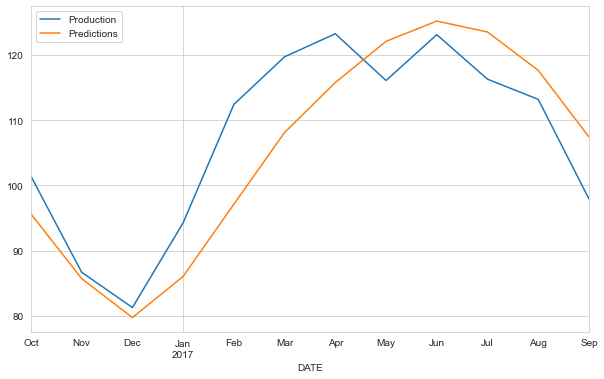

In [53]:
compare.plot();

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [54]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [55]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [56]:
len(df)

573

In [57]:
len(generator)

561

In [58]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 6s 7ms/step - loss: 0.0192
Epoch 2/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0052
Epoch 3/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0045
Epoch 4/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0039
Epoch 5/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0036
Epoch 6/15
561/561 [==============================] - 5s 8ms/step - loss: 0.0036
Epoch 7/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0037
Epoch 8/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0035
Epoch 9/15
561/561 [==============================] - 5s 9ms/step - loss: 0.0031
Epoch 10/15
561/561 [==============================] - 5s 8ms/step - loss: 0.0031
Epoch 11/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0031
Epoch 12/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0028
Epoch 13/15
561/561 [====

In [59]:
scaled_full_data.shape

(573, 1)

In [60]:
scaled_full_data[-length:].shape

(12, 1)

In [61]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
# tüm datamın son 12 ye 1 lik kısmını aldım. artık bunu ileriye doğru predict te (forecast) kullanıcam
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)
    
    # Burada tüm datamızın sonundan 12lik bir parçayı aldık. bu bizim ilk eval_batch imiz olacak. 
# sonra bunu reshape yaptık (1,12,1) oldu  ( (1, length, n_features) )
# bundan for döngüsü içinde current_batch i hep bir ilerletecek şekilde predict ler alıp alıp forecast e kaydettim. 

1/1 [==============================] - 0s 16ms/step


In [62]:
forecast = scaler.inverse_transform(forecast)

In [63]:
forecast

array([[ 89.98297424],
       [ 84.43464014],
       [ 86.12693602],
       [ 92.27039717],
       [ 99.67813469],
       [106.38557425],
       [111.45549082],
       [114.19629927],
       [113.34335851],
       [108.24255765],
       [100.45414751],
       [ 91.96382881]])

In [64]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [65]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [66]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [67]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
# forecast lerden dataframe oluşturduk

In [68]:
forecast_df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2019-10-01 to 2020-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Forecast  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


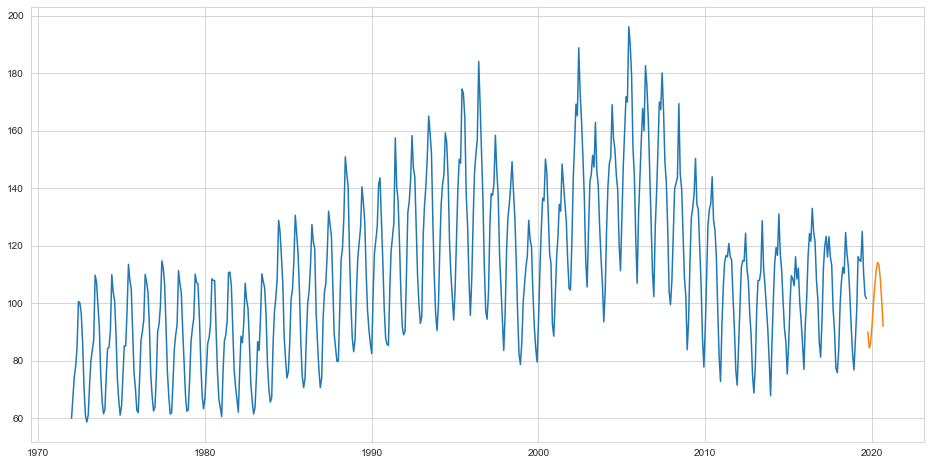

In [69]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

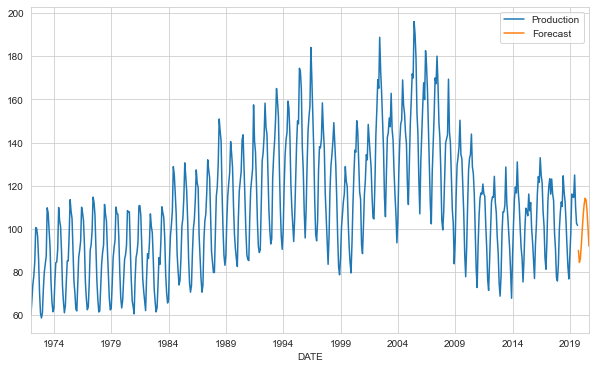

In [70]:
ax = df.plot()
forecast_df.plot(ax = ax);

(576.0, 611.0)

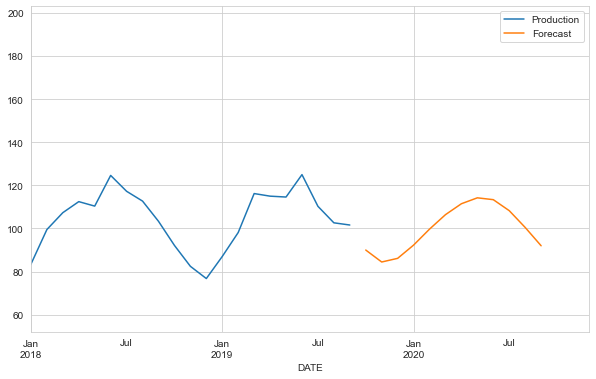

In [71]:
ax = df.plot()
forecast_df.plot(ax = ax)
plt.xlim('2018-01-01', '2020-12-01')

In [72]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)

<AxesSubplot:>

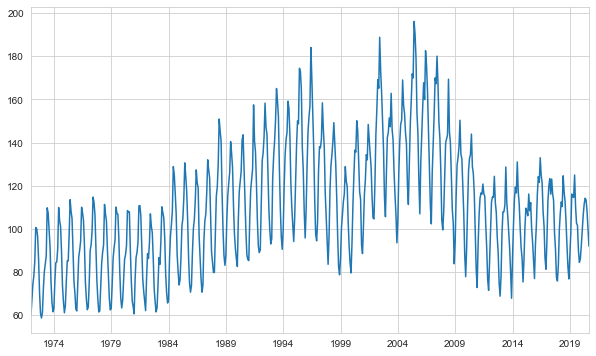

In [73]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___